Malware Detection Using Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
malware_data=pd.read_csv("C:/Users/Thales/Downloads/Malware_dataset.csv")

In [3]:
malware_data.head(2)

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
malware_data.shape

(100000, 35)

In [5]:
#check for null columns
# malware_data.isnull().sum()

In [6]:
malware_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [7]:
# drop value if there is "any" null values in dataset
clean_malware_data = malware_data.dropna(how='any', axis=0)

In [8]:
clean_malware_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [9]:
clean_malware_data['classification'].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [10]:
# replace benign with 0 and malware with 1 value.
clean_malware_data['classification'] = clean_malware_data.classification.map({'benign':0, 'malware':1})

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


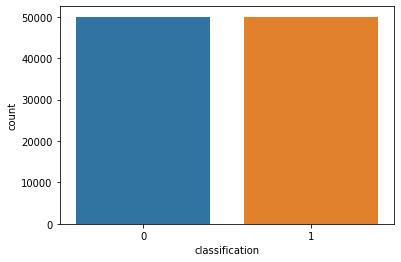

In [11]:
sns.countplot(clean_malware_data['classification'])
plt.show()

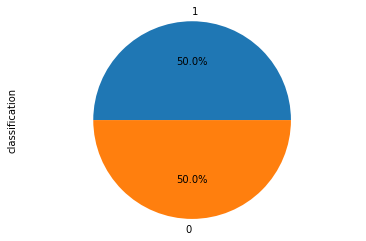

In [12]:
clean_malware_data['classification'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [13]:
benign_data=malware_data.loc[malware_data['classification']=='benign']
benign_data["classification"].head()

1000    benign
1001    benign
1002    benign
1003    benign
1004    benign
Name: classification, dtype: object

In [14]:
malware=malware_data.loc[malware_data['classification']=='malware']
malware["classification"].head()

0    malware
1    malware
2    malware
3    malware
4    malware
Name: classification, dtype: object

In [15]:
# find the pairwise correlation of all columns in the dataframe
correlation=clean_malware_data.corr()
correlation.nlargest(35,'classification')["classification"]

classification       1.000000e+00
prio                 1.100359e-01
last_interval        6.952036e-03
min_flt              3.069595e-03
millisecond          5.482134e-15
gtime               -1.441608e-02
stime               -4.203713e-02
free_area_cache     -5.123678e-02
total_vm            -5.929110e-02
state               -6.470178e-02
mm_users            -9.364091e-02
reserved_vm         -1.186078e-01
fs_excl_counter     -1.378830e-01
nivcsw              -1.437912e-01
exec_vm             -2.551234e-01
map_count           -2.712274e-01
static_prio         -3.179406e-01
end_data            -3.249535e-01
maj_flt             -3.249535e-01
shared_vm           -3.249535e-01
vm_truncate_count   -3.548607e-01
utime               -3.699309e-01
nvcsw               -3.868893e-01
usage_counter                 NaN
normal_prio                   NaN
policy                        NaN
vm_pgoff                      NaN
task_size                     NaN
cached_hole_size              NaN
hiwater_rss   

In [16]:
X=clean_malware_data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
X.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,task_size,cached_hole_size,...,end_data,last_interval,nivcsw,min_flt,fs_excl_counter,lock,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0


In [17]:
Y=clean_malware_data['classification']

In [18]:
# train/test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [19]:
# Model
model=GaussianNB()
# Train
model.fit(x_train,y_train)
# Prediction
pred=model.predict(x_test)
# Evaluation
model.score(x_test,y_test)

0.6274

In [20]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})

In [21]:
result

,Actual_Value,Predict_Value
43660,0,1
87278,1,1
14317,0,1
81932,1,1
95321,1,1
...,...,...
994,1,1
42287,0,1
4967,0,1
47725,0,0


Breast-cancer Using KNN Algorithm

In [22]:
cancer_data = pd.read_csv('C:/Users/Thales/Downloads/breast-cancer.csv')

In [23]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [25]:
cancer_data=cancer_data.drop(['Unnamed: 32', 'id'], axis=1)

In [26]:
# Replace B vaue with 0, M value with 1
cancer_data['diagnosis']=cancer_data['diagnosis'].map({'B':0,'M':1}).astype(int)

In [27]:
# find the pairwise correlation of all columns in the dataframe
cancer_correlation=cancer_data.corr()
cancer_correlation.nlargest(30,'diagnosis')['diagnosis']

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [28]:
X=cancer_data[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se', 'area_se','compactness_se', 'concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']]
Y=cancer_data[['diagnosis']]

In [29]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=1)

In [30]:
# Model Selection
KNN_Model = KNeighborsClassifier(n_neighbors=8)
KNN_Model.fit(x_train, y_train)

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [31]:
# Prediction
KNN_prediction = KNN_Model.predict(x_test)
accuracy_score(KNN_prediction, y_test)

0.9298245614035088

In [32]:
KNN_accuracy = KNN_Model.score(x_train,y_train)
KNN_accuracy

0.9321608040201005

In [33]:
KNN_prediction.max()

1

In [34]:
KNN_score=cross_val_score(KNN_Model,X,Y,cv=2)

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
# Random forest Model
random_forest_model = RandomForestClassifier(max_depth=6,random_state=5)

In [36]:
#Model
random_forest_model.fit(x_train, y_train)

C:\Users\Thales\AppData\Local\Temp\ipykernel_13388\2717990082.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, random_state=5)

In [37]:
# Prediction
RF_predict= random_forest_model.predict(x_test)
accuracy_score(RF_predict, y_test)

0.9532163742690059

In [38]:
RF_predict.max()

1

In [39]:
# Accuracy
RF_accuracy= random_forest_model.score(x_test,y_test)
RF_accuracy

0.9532163742690059

In [40]:
RF_score=cross_val_score(random_forest_model,X,Y,cv=2)
RF_score

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.94385965, 0.9471831 ])

Logistic Regression

In [41]:
iris_data = pd.read_csv("C:/Users/Thales/Downloads/iris.csv")

In [42]:
iris_data.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [43]:
iris_data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [44]:
clean_iris_data=iris_data.dropna(how='any', axis=0)

In [45]:
clean_iris_data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [46]:
clean_iris_data.groupby(iris_data['sepal.length'])['variety'].value_counts()

sepal.length  variety   
4.3           Setosa        1
4.4           Setosa        3
4.5           Setosa        1
4.6           Setosa        4
4.7           Setosa        2
4.8           Setosa        5
4.9           Setosa        4
              Versicolor    1
              Virginica     1
5.0           Setosa        8
              Versicolor    2
5.1           Setosa        8
              Versicolor    1
5.2           Setosa        3
              Versicolor    1
5.3           Setosa        1
5.4           Setosa        5
              Versicolor    1
5.5           Versicolor    5
              Setosa        2
5.6           Versicolor    5
              Virginica     1
5.7           Versicolor    5
              Setosa        2
              Virginica     1
5.8           Versicolor    3
              Virginica     3
              Setosa        1
5.9           Versicolor    2
              Virginica     1
6.0           Versicolor    4
              Virginica     2
6.1           V

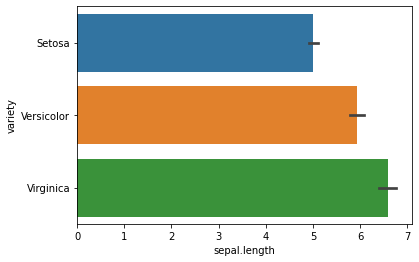

In [47]:
sns.barplot(x='sepal.length',y='variety',data=iris_data)
plt.show()

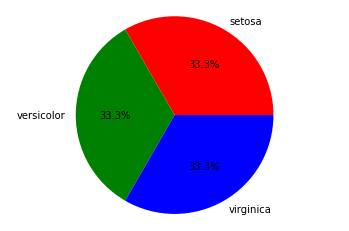

In [48]:
labels='setosa','versicolor','virginica'
colors = ['red','green','blue']
g=clean_iris_data.variety.value_counts()
plt.pie(g,labels=labels,colors=colors,autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.xticks(rotation=0)
plt.show()

In [49]:
X= iris_data[['sepal.length','sepal.width','petal.length','petal.width']]
Y= iris_data[['variety']]

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [51]:
# Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)
#Predict
prediction_logistic =logistic_model.predict(X_test)

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
logistic_test_score=logistic_model.score(X_test,Y_test)
logistic_test_score

0.9777777777777777

In [53]:
logistic_accuracy= accuracy_score(prediction_logistic, Y_test)
logistic_accuracy

0.9777777777777777

In [54]:
logistic_score=cross_val_score(logistic_model,X,Y,cv=2)
logistic_score

c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Thales\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passe

array([0.96, 0.96])